# Project: Writing a Data Scientist Blog Post

Looking at the following questions:
- 1.How is the career satisfaction influenced by company size and job seeking status?
- 2.What are the professions and salary feelings of those who work in a Publicly-traded corporation?
- 3.How well can we predict an individual's career satisfaction based on current salary, hours worked per week and job satisfaction? What aspects correlate well with the career satisfaction?

In [1]:
#libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#to avoid errors
pd.options.mode.chained_assignment = None

#get the data
df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#number of rows and cols in the dataset
print(f"No of rows: {df.shape[0]}, no of cols {df.shape[1]}")

No of rows: 19102, no of cols 154


## Q1: How is the career satisfaction influenced by company size and job seeking status?

In [3]:
#keep only the cols I need for Q1
df1 = df[['Respondent','Professional','CompanySize','CareerSatisfaction','JobSeekingStatus']]
df1.head()

,Respondent,Professional,CompanySize,CareerSatisfaction,JobSeekingStatus
0,1,Student,NaN,NaN,"I'm not actively looking, but I am open to new..."
1,2,Student,20 to 99 employees,NaN,NaN
2,3,Professional developer,"10,000 or more employees",8.0,NaN
3,4,Professional non-developer who sometimes write...,"10,000 or more employees",6.0,I am actively looking for a job
4,5,Professional developer,10 to 19 employees,6.0,NaN


In [4]:
#null sum
np.sum(df1.isnull())

Respondent               0
Professional             0
CompanySize           4449
CareerSatisfaction    3000
JobSeekingStatus      6250
dtype: int64

In [5]:
#null sum over 50%?
np.sum(df1.isnull())/df1.shape[0]>0.5

Respondent            False
Professional          False
CompanySize           False
CareerSatisfaction    False
JobSeekingStatus      False
dtype: bool

In [6]:
#value counts for companysize
df1["CompanySize"].value_counts(dropna=False)

NaN                         4449
20 to 99 employees          3214
100 to 499 employees        2858
10,000 or more employees    1998
10 to 19 employees          1544
1,000 to 4,999 employees    1482
Fewer than 10 employees     1456
500 to 999 employees         946
5,000 to 9,999 employees     606
I don't know                 311
I prefer not to answer       238
Name: CompanySize, dtype: int64

In [7]:
#replace NAN with 'Did not answer the question' 
#as I don't want to drop these rows as I am interested where do people who didn't answer at all sit
df1["CompanySize"]=df1.CompanySize.fillna('Did not answer the question')

#new value counts
df1["CompanySize"].value_counts()

Did not answer the question    4449
20 to 99 employees             3214
100 to 499 employees           2858
10,000 or more employees       1998
10 to 19 employees             1544
1,000 to 4,999 employees       1482
Fewer than 10 employees        1456
500 to 999 employees            946
5,000 to 9,999 employees        606
I don't know                    311
I prefer not to answer          238
Name: CompanySize, dtype: int64

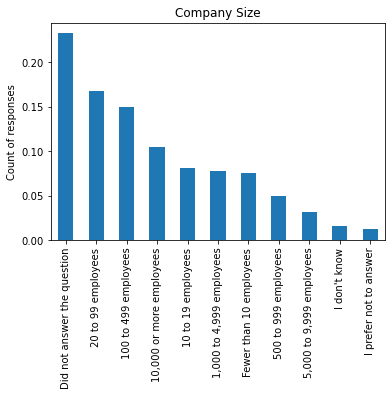

In [8]:
#plot the company size counts
cs=df1["CompanySize"].value_counts()
(cs/df.shape[0]).plot(kind="bar");
plt.title("Company Size");
plt.ylabel('Count of responses');

In [9]:
#breakdown as %
df1["CompanySize"].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'

Did not answer the question    23.3%
20 to 99 employees             16.8%
100 to 499 employees           15.0%
10,000 or more employees       10.5%
10 to 19 employees              8.1%
1,000 to 4,999 employees        7.8%
Fewer than 10 employees         7.6%
500 to 999 employees            5.0%
5,000 to 9,999 employees        3.2%
I don't know                    1.6%
I prefer not to answer          1.2%
Name: CompanySize, dtype: object

In [10]:
#value counts for JobSeekingStatus
df1["JobSeekingStatus"].value_counts(dropna=False)

I'm not actively looking, but I am open to new opportunities    8026
NaN                                                             6250
I am not interested in new job opportunities                    3294
I am actively looking for a job                                 1532
Name: JobSeekingStatus, dtype: int64

In [11]:
#replace NAN with 'Did not answer the question', 
#as I don't want to drop these rows as I am interested where do people who didn't answer at all sit
df1["JobSeekingStatus"]=df1.JobSeekingStatus.fillna('Did not answer the question')

#value counts for JobSeekingStatus
df1["JobSeekingStatus"].value_counts()

I'm not actively looking, but I am open to new opportunities    8026
Did not answer the question                                     6250
I am not interested in new job opportunities                    3294
I am actively looking for a job                                 1532
Name: JobSeekingStatus, dtype: int64

In [12]:
#breakdown as %
df1["JobSeekingStatus"].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'

I'm not actively looking, but I am open to new opportunities    42.0%
Did not answer the question                                     32.7%
I am not interested in new job opportunities                    17.2%
I am actively looking for a job                                  8.0%
Name: JobSeekingStatus, dtype: object

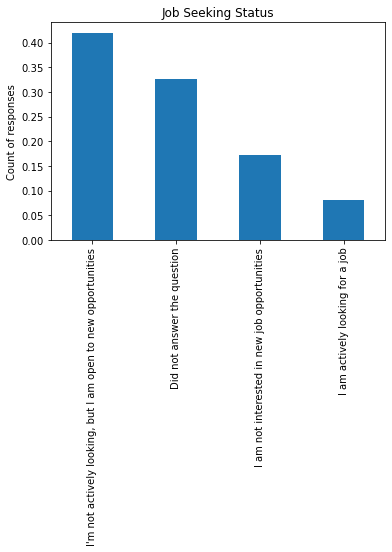

In [13]:
# plot graph for JobSeekingStatus
jss=df1["JobSeekingStatus"].value_counts()
(jss/df.shape[0]).plot(kind="bar");
plt.title("Job Seeking Status");
plt.ylabel('Count of responses');

In [14]:
#value counts for CareerSatisfaction
df1["CareerSatisfaction"].value_counts(dropna=False)

8.0     4247
7.0     3624
NaN     3000
9.0     2127
10.0    2053
6.0     1684
5.0     1132
4.0      481
3.0      376
2.0      177
0.0      136
1.0       65
Name: CareerSatisfaction, dtype: int64

In [15]:
#fill CareerSatisfaction with mode  (mode makes sense to be used here, rather than mean for example)
df1['CareerSatisfaction'].fillna(df1['CareerSatisfaction'].mode()[0], inplace=True)
df1

,Respondent,Professional,CompanySize,CareerSatisfaction,JobSeekingStatus
0,1,Student,Did not answer the question,8.0,"I'm not actively looking, but I am open to new..."
1,2,Student,20 to 99 employees,8.0,Did not answer the question
2,3,Professional developer,"10,000 or more employees",8.0,Did not answer the question
3,4,Professional non-developer who sometimes write...,"10,000 or more employees",6.0,I am actively looking for a job
4,5,Professional developer,10 to 19 employees,6.0,Did not answer the question
...,...,...,...,...,...
19097,19098,Professional developer,10 to 19 employees,9.0,"I'm not actively looking, but I am open to new..."
19098,19099,Student,Did not answer the question,8.0,Did not answer the question
19099,19100,Professional non-developer who sometimes write...,Did not answer the question,4.0,Did not answer the question
19100,19101,Professional developer,100 to 499 employees,8.0,Did not answer the question


In [16]:
#value counts for CareerSatisfaction
df1["CareerSatisfaction"].value_counts(dropna=False)

8.0     7247
7.0     3624
9.0     2127
10.0    2053
6.0     1684
5.0     1132
4.0      481
3.0      376
2.0      177
0.0      136
1.0       65
Name: CareerSatisfaction, dtype: int64

In [17]:
#group and mean (mean works best here)
df1.groupby(df1["CompanySize"]).mean()['CareerSatisfaction'].sort_values()

CompanySize
Fewer than 10 employees        7.339973
10,000 or more employees       7.412913
20 to 99 employees             7.418793
5,000 to 9,999 employees       7.422442
10 to 19 employees             7.432642
1,000 to 4,999 employees       7.437922
Did not answer the question    7.453585
500 to 999 employees           7.497886
100 to 499 employees           7.517495
I don't know                   7.559486
I prefer not to answer         7.659664
Name: CareerSatisfaction, dtype: float64

In [18]:
#group and mean (mean works best here)
df1.groupby(df1["JobSeekingStatus"]).mean()['CareerSatisfaction'].sort_values()

JobSeekingStatus
I am actively looking for a job                                 6.656658
I'm not actively looking, but I am open to new opportunities    7.353476
Did not answer the question                                     7.416480
I am not interested in new job opportunities                    8.100182
Name: CareerSatisfaction, dtype: float64

### Outcome for Q1

- It seems that the higher career satisfaction is associated with the people who preferred not to answer on the company size. Interestingly, a company size of few employees (less than 10) and a company size with more than 10K are providing the least career satisfaction, whereas, 100-999 company size employees provide a higher career satisfaction. 
- As expected, the data shows that the people who are actively looking for a new role, are having the least career satisfaction, and those who aren't interested at all have the highest career satisfaction.


## Q2: What are the professions and salary feelings of those who work in a Publicly-traded corporation?

In [19]:
#get the columns I need in df2
df2 = df[['Respondent','CompanyType','Professional','Overpaid']]
df2.head()

,Respondent,CompanyType,Professional,Overpaid
0,1,NaN,Student,NaN
1,2,"Privately-held limited company, not in startup...",Student,NaN
2,3,Publicly-traded corporation,Professional developer,Neither underpaid nor overpaid
3,4,Non-profit/non-governmental organization or pr...,Professional non-developer who sometimes write...,NaN
4,5,"Privately-held limited company, not in startup...",Professional developer,NaN


In [20]:
#null sum
np.sum(df2.isnull())

Respondent          0
CompanyType      4493
Professional        0
Overpaid        13918
dtype: int64

In [21]:
#null sum over 50%?
np.sum(df2.isnull())/df2.shape[0]>0.5

Respondent      False
CompanyType     False
Professional    False
Overpaid         True
dtype: bool

In [22]:
#decided to drop the nan on Overpaid as it's over 50%
df2 = df2.dropna(subset=['Overpaid'], how='any')

#value counts for companysize
df2["Overpaid"].value_counts()

Somewhat underpaid                2346
Neither underpaid nor overpaid    1903
Greatly underpaid                  559
Somewhat overpaid                  348
Greatly overpaid                    28
Name: Overpaid, dtype: int64

In [23]:
#null sum
np.sum(df2.isnull())

Respondent       0
CompanyType     16
Professional     0
Overpaid         0
dtype: int64

In [24]:
#number of rows and cols in the dataset
print(f"No of rows: {df2.shape[0]}, no of cols {df2.shape[1]}")

No of rows: 5184, no of cols 4


In [25]:
#as it's only 16 rows nan in CompanyType, I've decided to drop them too
#decided to drop the nan on Overpaid as it's over 50%
df2 = df2.dropna(subset=['CompanyType'], how='any')

df2.head()

,Respondent,CompanyType,Professional,Overpaid
2,3,Publicly-traded corporation,Professional developer,Neither underpaid nor overpaid
8,9,"Privately-held limited company, not in startup...",Professional developer,Neither underpaid nor overpaid
14,15,Publicly-traded corporation,Professional developer,Somewhat underpaid
17,18,Publicly-traded corporation,Professional developer,Neither underpaid nor overpaid
18,19,Publicly-traded corporation,Professional developer,Somewhat overpaid


In [26]:
df2_ptc=df2[df2.CompanyType == "Publicly-traded corporation"]

df2_ptc.head()

,Respondent,CompanyType,Professional,Overpaid
2,3,Publicly-traded corporation,Professional developer,Neither underpaid nor overpaid
14,15,Publicly-traded corporation,Professional developer,Somewhat underpaid
17,18,Publicly-traded corporation,Professional developer,Neither underpaid nor overpaid
18,19,Publicly-traded corporation,Professional developer,Somewhat overpaid
25,26,Publicly-traded corporation,Professional developer,Neither underpaid nor overpaid


In [27]:
#number of rows and cols in the dataset
print(f"No of rows: {df2_ptc.shape[0]}, no of cols {df2_ptc.shape[1]}")

No of rows: 909, no of cols 4


In [28]:
#value counts for Professional
df2_ptc["Professional"].value_counts()

Professional developer    909
Name: Professional, dtype: int64

In [29]:
#value counts for Overpaid
df2_ptc["Overpaid"].value_counts()

Somewhat underpaid                398
Neither underpaid nor overpaid    373
Somewhat overpaid                  74
Greatly underpaid                  58
Greatly overpaid                    6
Name: Overpaid, dtype: int64

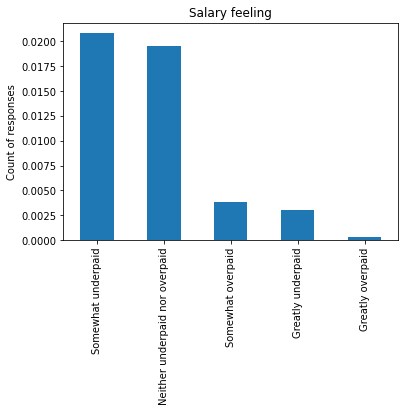

In [30]:
# plot graph 
df2_ptc2=df2_ptc["Overpaid"].value_counts()
(df2_ptc2/df.shape[0]).plot(kind="bar");
plt.title("Salary feeling");
plt.ylabel('Count of responses');

In [31]:
#breakdown as %
round(df2_ptc2/len(df2_ptc)*100,1).astype(str) + '%'

Somewhat underpaid                43.8%
Neither underpaid nor overpaid    41.0%
Somewhat overpaid                  8.1%
Greatly underpaid                  6.4%
Greatly overpaid                   0.7%
Name: Overpaid, dtype: object

### Outcome for Q2

- Once dropping all the NAN data and filtering solely on "Publicly-traded corporation" the results are interesting. Firstly, we only have 'Professional developers' and secondly, 44% suggested that they feel somehow underpaid, whereas 41% suggest they are just right. A very small percentage (less than 1%) feel like they are greatly overpaid. 

## Q3: How well can we predict an individual's career satisfaction based on current salary, hours worked per week and job satisfaction?

In [32]:
#get the columns I need in df3
df3 = df[['Respondent','Salary','CareerSatisfaction','HoursPerWeek', 'JobSatisfaction']]
df3.head()

,Respondent,Salary,CareerSatisfaction,HoursPerWeek,JobSatisfaction
0,1,NaN,NaN,0.0,NaN
1,2,NaN,NaN,NaN,NaN
2,3,113750.0,8.0,NaN,9.0
3,4,NaN,6.0,5.0,3.0
4,5,NaN,6.0,NaN,8.0


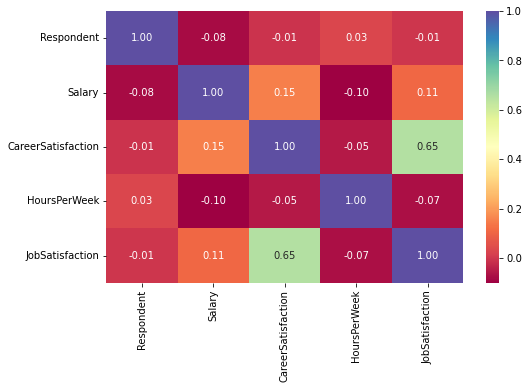

In [33]:
#heatmap
corr_matrix = df3.corr()
plt.figure(figsize = (8,5))
sns.heatmap(corr_matrix, cmap="Spectral", annot=True, fmt='.2f')
plt.show()

In [34]:
#null sum over 50%?
np.sum(df3.isnull())/df3.shape[0]>0.5

Respondent            False
Salary                 True
CareerSatisfaction    False
HoursPerWeek           True
JobSatisfaction       False
dtype: bool

In [35]:
#percentage of missing values per column, rounded up 
round(df3.isnull().sum()/len(df3)*100,0).astype(str) + '%'

Respondent             0.0%
Salary                74.0%
CareerSatisfaction    16.0%
HoursPerWeek          60.0%
JobSatisfaction       20.0%
dtype: object

In [36]:
df3.describe()

,Respondent,Salary,CareerSatisfaction,HoursPerWeek,JobSatisfaction
count,19102.000000,5009.000000,16102.000000,7721.000000,15253.000000
mean,9551.500000,58341.398571,7.343932,3.685922,7.000721
std,5514.416757,40753.384986,1.919330,7.330691,2.128648
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4776.250000,27956.989247,6.000000,0.000000,6.000000
50%,9551.500000,51612.903226,8.000000,1.000000,7.000000
75%,14326.750000,83333.333333,9.000000,3.000000,8.000000
max,19102.000000,195000.000000,10.000000,40.000000,10.000000


In [37]:
#fill columns with mean (as it will work better)
df3['Salary'].fillna(int(df3['Salary'].mean()), inplace=True) 
df3['HoursPerWeek'].fillna(int(df3['HoursPerWeek'].mean()), inplace=True) 

#fill columns with mode (as it will work better)
df3['CareerSatisfaction'].fillna(df3['CareerSatisfaction'].mode()[0], inplace=True)
df3['JobSatisfaction'].fillna(df3['JobSatisfaction'].mode()[0], inplace=True)

In [38]:
#percentage of missing values per column, rounded up 
round(df3.isnull().sum()/len(df3)*100,0).astype(str) + '%'

Respondent            0.0%
Salary                0.0%
CareerSatisfaction    0.0%
HoursPerWeek          0.0%
JobSatisfaction       0.0%
dtype: object

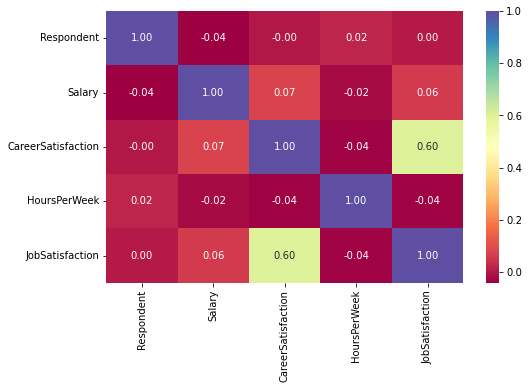

In [39]:
#heatmap after data cleansing
corr_matrix = df3.corr()
plt.figure(figsize = (8,5))
sns.heatmap(corr_matrix, cmap="Spectral", annot=True, fmt='.2f')
plt.show()

In [40]:
df3.head()

,Respondent,Salary,CareerSatisfaction,HoursPerWeek,JobSatisfaction
0,1,58341.0,8.0,0.0,8.0
1,2,58341.0,8.0,3.0,8.0
2,3,113750.0,8.0,3.0,9.0
3,4,58341.0,6.0,5.0,3.0
4,5,58341.0,6.0,3.0,8.0


In [41]:
#Split into explanatory and response variables
X = df3[['Respondent','Salary','CareerSatisfaction','HoursPerWeek', 'JobSatisfaction']]
y = df3['CareerSatisfaction']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

print("Test score r2: ", test_score, ", Train score r2: ",train_score)

Test score r2:  1.0 , Train score r2:  1.0


### Outcome for Q3

- The heatmap suggests a moderate positive correlation between “Career Satisfaction” and “Job Satisfaction” but no correlation between “Salary” and “Hours Per Week” with the “Career Satisfaction”. 
- The Linear Regression most likely overfits, requiring another look at the data used.